## **Importing Libraries**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_columns",30)
pd.set_option("display.max_colwidth",50)

# **<p style="color:Orange;">Project:</p>**

## **<p style="color:#3498db;"> 🎬 Movie Dataset Analysis – Storytelling with Data</p>**



> _"Cinema is a mirror of society — and data helps us read its reflection."_

This project dives deep into a curated dataset of films. Through data wrangling and visualization, we unravel patterns around languages, genres, studios, ratings, and more. Here’s the story your data tells:


In [116]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Movie_Data_File.csv")

## Data Info

In [117]:
df.shape

(10002, 29)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         10002 non-null  object 
 1   Release_year       0 non-null      float64
 2   Director           9992 non-null   object 
 3   Cast               9945 non-null   object 
 4   Average_rating     9421 non-null   float64
 5   Owner_rating       967 non-null    float64
 6   Genres             9978 non-null   object 
 7   Runtime            9992 non-null   float64
 8   Countries          9884 non-null   object 
 9   Original_language  9999 non-null   object 
 10  Spoken_languages   9999 non-null   object 
 11  Description        10000 non-null  object 
 12  Studios            9695 non-null   object 
 13  Watches            10002 non-null  int64  
 14  List_appearances   10002 non-null  int64  
 15  Likes              10002 non-null  int64  
 16  Fans               100

## Data Handling & Cleaning


### 🔍 1. Data Cleaning & Preparation

- Removed irrelevant columns like `Cast`, `Film_URL`, and half-star ratings for clarity.
- Replaced missing values in key columns:
  - `Studios` → "Unknown"
  - `Average_rating` → Replaced with overall average
  - `Runtime` → Replaced with mean runtime
- Dropped duplicate records and ensured the dataset was clean for analysis.


In [119]:
# Removing Unnecesary Columns For Better Readability
df.drop(columns=["Cast","Owner_rating","Countries","Spoken_languages","½","★½","★★","★★½","★★★½","★★★★","★★★★½","Film_URL","Release_year","List_appearances"],inplace=True)

In [120]:
df=df.rename(columns={"★":"Lowest★","★★★":"Medium★★★","★★★★★":"Highest★★★★★"})

In [121]:
df.shape

(10002, 15)

In [122]:
df.isna().sum()

Film_title             0
Director              10
Average_rating       581
Genres                24
Runtime               10
Original_language      3
Description            2
Studios              307
Watches                0
Likes                  0
Fans                   0
Lowest★                0
Medium★★★              0
Highest★★★★★           0
Total_ratings          0
dtype: int64

### `Filling Nan Values`

In [123]:
x=df["Studios"].value_counts().reset_index()
x
df["Studios"]=df["Studios"].fillna("Unknown") #Filling The NAN values in Studios column
df["Average_rating"].mean()
df["Average_rating"]=df["Average_rating"].fillna(df["Average_rating"].mean()) # Filling The NAN values with average in AVG RATING Column
df["Runtime"]=df["Runtime"].fillna(df["Runtime"].mean())
df["Genres"]=df["Genres"].fillna("Unknown")
df.dropna(subset=["Description"],inplace=True)
df["Original_language"]=df["Original_language"].fillna("Unknown")
df["Director"]=df["Director"].fillna("Unknown")

In [124]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## EDA & Visualization


> 🧼 *A clean dataset is the canvas for a meaningful story.*

---

## 🌍 2. Language Distribution & Cultural Reach

- 🔢 Counted occurrences of films by `Original_language`.
- 🥇 Top 5 languages were visualized using both **histograms** and **pie charts**.

🎯 **Insight**: A majority of films are produced in a few dominant languages, indicating cultural and market influences.

### `Original Language Counts`

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, 'German'),
  Text(1, 0, 'English'),
  Text(2, 0, 'Japanese'),
  Text(3, 0, 'French'),
  Text(4, 0, 'Spanish'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Cantonese'),
  Text(7, 0, 'Indonesian'),
  Text(8, 0, 'Korean'),
  Text(9, 0, 'No spoken language'),
  Text(10, 0, 'Russian'),
  Text(11, 0, 'Swedish'),
  Text(12, 0, 'Danish'),
  Text(13, 0, 'Dutch'),
  Text(14, 0, 'Polish'),
  Text(15, 0, 'Hungarian'),
  Text(16, 0, 'Mayan'),
  Text(17, 0, 'Thai'),
  Text(18, 0, 'Greek (modern)'),
  Text(19, 0, 'Persian (Farsi)'),
  Text(20, 0, 'Norwegian'),
  Text(21, 0, 'Portuguese'),
  Text(22, 0, 'Czech'),
  Text(23, 0, 'Chinese'),
  Text(24, 0, 'Turkish'),
  

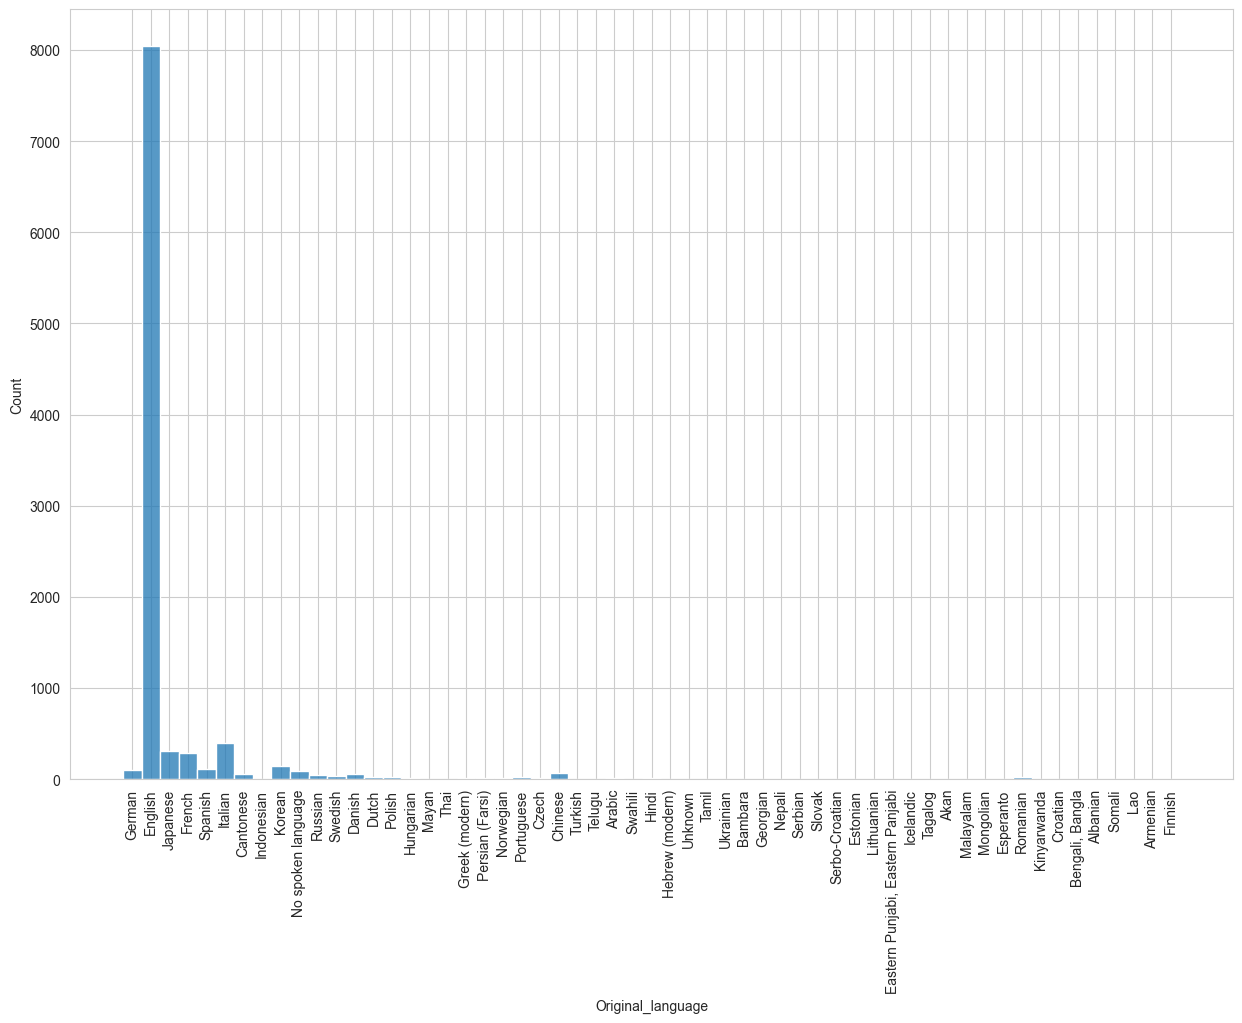

In [125]:
plt.figure(figsize=(15,10))
sns.histplot(data=df["Original_language"])
plt.xticks(rotation=90)

### `Top 5 Original Languages`

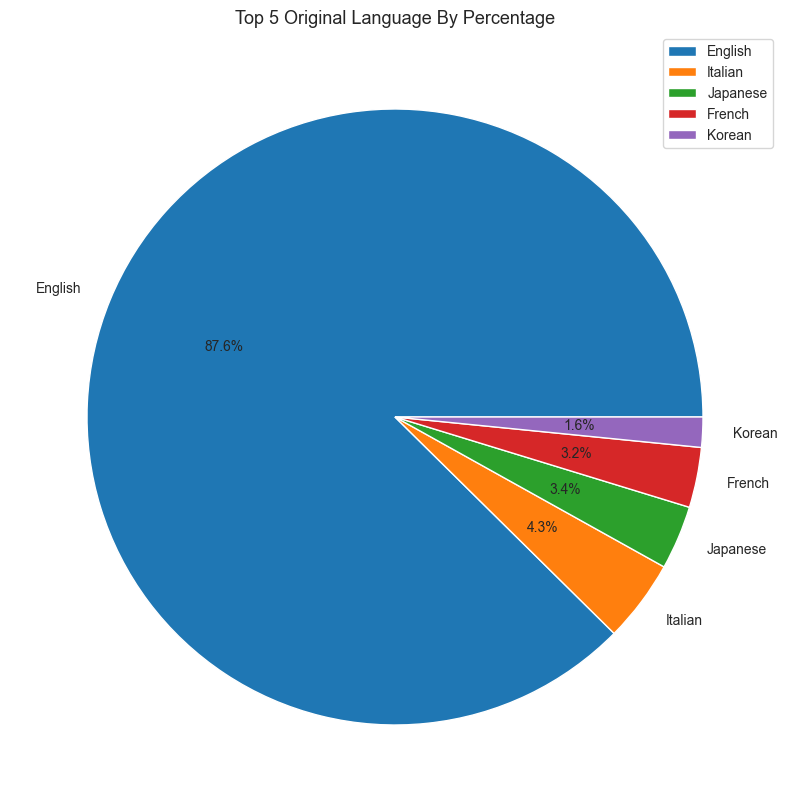

In [126]:
pi=df["Original_language"].value_counts().nlargest(5)
plt.figure(figsize=(10,10))
plt.pie(pi,autopct="%1.1f%%",labels=pi.index)
plt.legend()
plt.title("Top 5 Original Language By Percentage",fontsize=13)
plt.show()

## ⏱️ 3. Runtime Analysis

- Grouped films by their `Runtime` and visualized the **Top 25 longest films**.
- Notable outliers stood out — indicating either epic sagas or inefficient editing.

> 🎬 *Long runtimes don’t guarantee greatness, but they demand attention.*

---

### `Top 25 Highest Runtime Movies`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\2056387935.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Berlin Alexanderplatz'),
  Text(1, 0, 'Out 1'),
  Text(2, 0, 'Big Little Lies'),
  Text(3, 0, 'I, Claudius'),
  Text(4, 0, 'Brideshead Revisited'),
  Text(5, 0, 'Your Honor'),
  Text(6, 0, 'The Underground Railroad'),
  Text(7, 0, 'Shoah'),
  Text(8, 0, 'Tie Xi Qu: West of the Tracks'),
  Text(9, 0, 'Into the West'),
  Text(10, 0, 'Planet Earth'),
  Text(11, 0, 'The Stand'),
  Text(12, 0, 'John Adams'),
  Text(13, 0, 'Squid Game'),
  Text(14, 0, 'The Haunting of Bly Manor'),
  Text(15, 0, 'The Last Dance'),
  Text(16, 0, 'O.J.: Made in America'),
  Text(17, 0, 'Godless'),
  Text(18, 0, 'We Are Who We Are'),
  Text(19, 0, '11.22.63'),
  Text(20, 0, 'The Disappearance of Madeleine McCann'),
  Text(21, 0, 'Satantango'),
  Text(22, 0, 'The Vampires or, The Arch Criminals of Paris'),
  Text(23, 0, 'Mare of Easttown'),
  Text(24, 0, "Marve

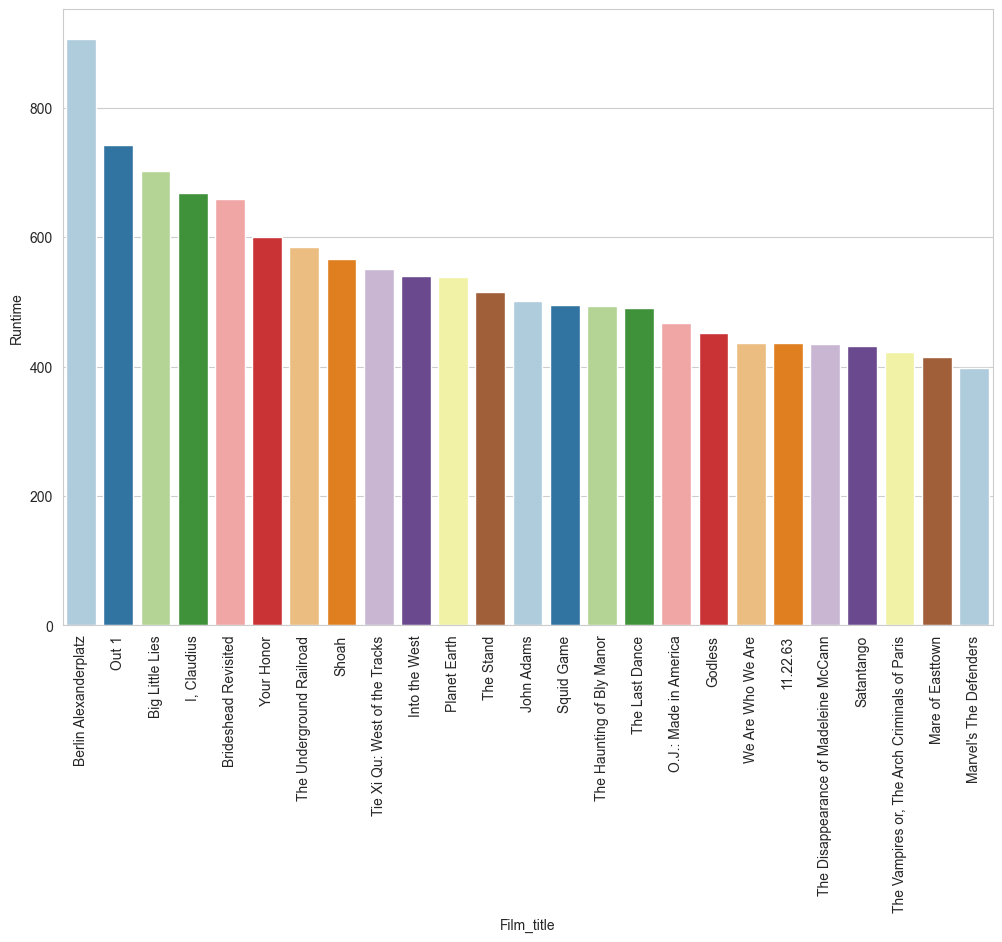

In [127]:
classifi_ru = df.groupby(["Film_title", "Runtime"]).sum().reset_index()
classifi_run = classifi_ru[["Film_title", "Runtime"]]  # Select the correct columns
classifi_runtime = classifi_run.sort_values("Runtime", ascending=False).head(25)  # Sort & get top 25

plt.figure(figsize=(12,8))
sns.barplot(data=classifi_runtime,x="Film_title",y="Runtime",palette="Paired")
plt.xticks(rotation=90)


## 🎯 4. Film Classification by Engagement

Analyzed metrics like:
- `Watches` – View count
- `Likes` – Audience approval
- `Fans` – Core followers

Visualized with histograms and bar plots to show distribution.

### `Classification of Films By Runtime,Watches,Likes And Fans`

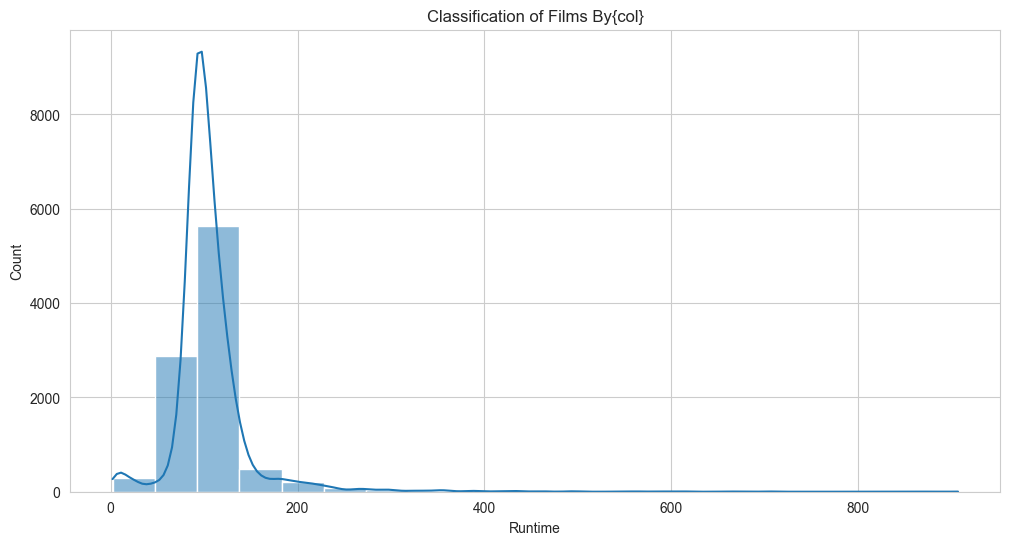

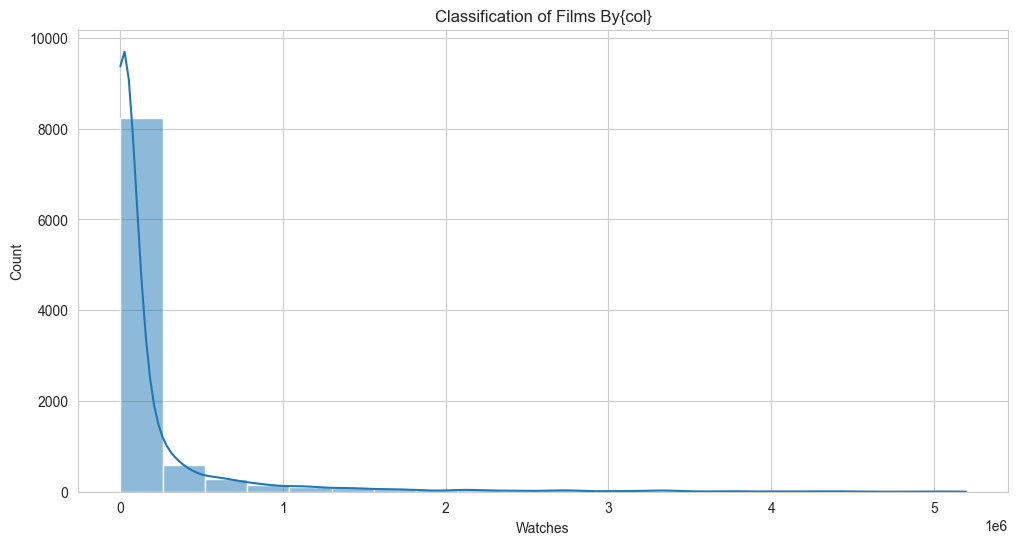

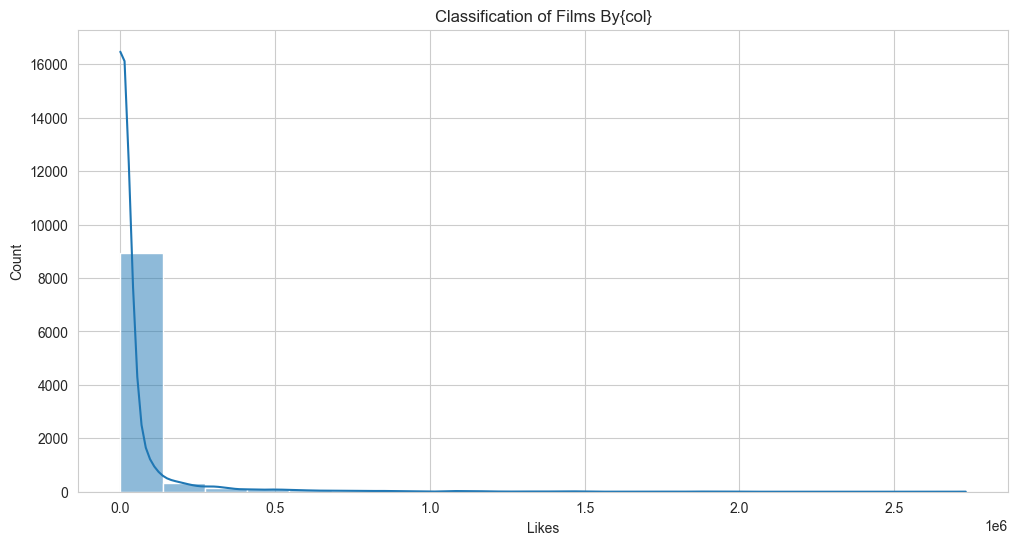

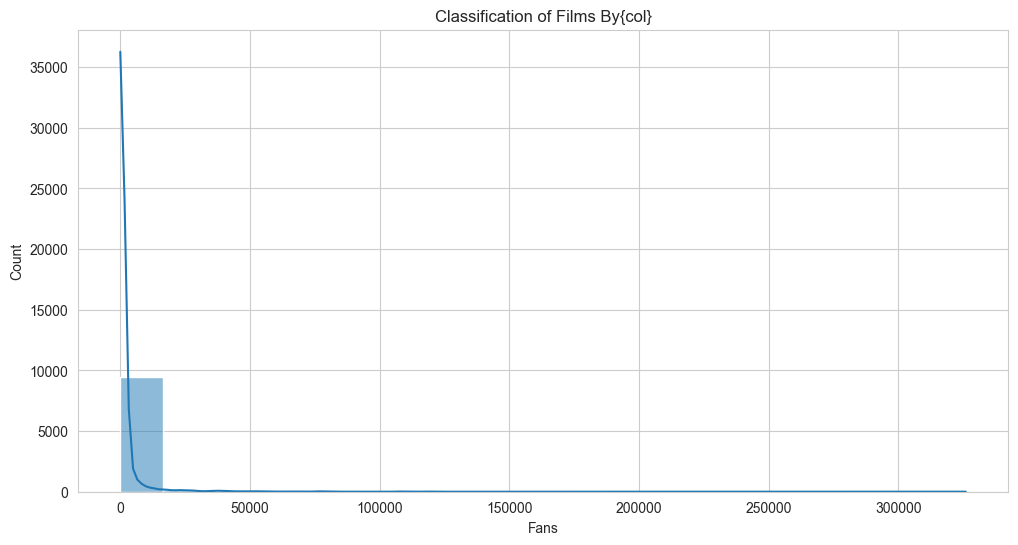

In [128]:
classifi_fi=df.groupby("Film_title").agg({ "Runtime":"sum", "Watches":"sum", "Likes":"sum", "Fans":"sum" }).reset_index().sort_values(["Runtime","Watches","Likes","Fans"],ascending=False)
for col in classifi_fi:
    if col not in ["Film_title"]:
        plt.figure(figsize=(12,6))
        sns.histplot(data=classifi_fi,x=col,kde=True,bins=20)
        plt.title("Classification of Films By{col}")
        plt.show()

### `Visualization Of Top 25 Movies By Runtime,Fans,Likes And Watches`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\3206698690.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\3206698690.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\3206698690.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\3206698690.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

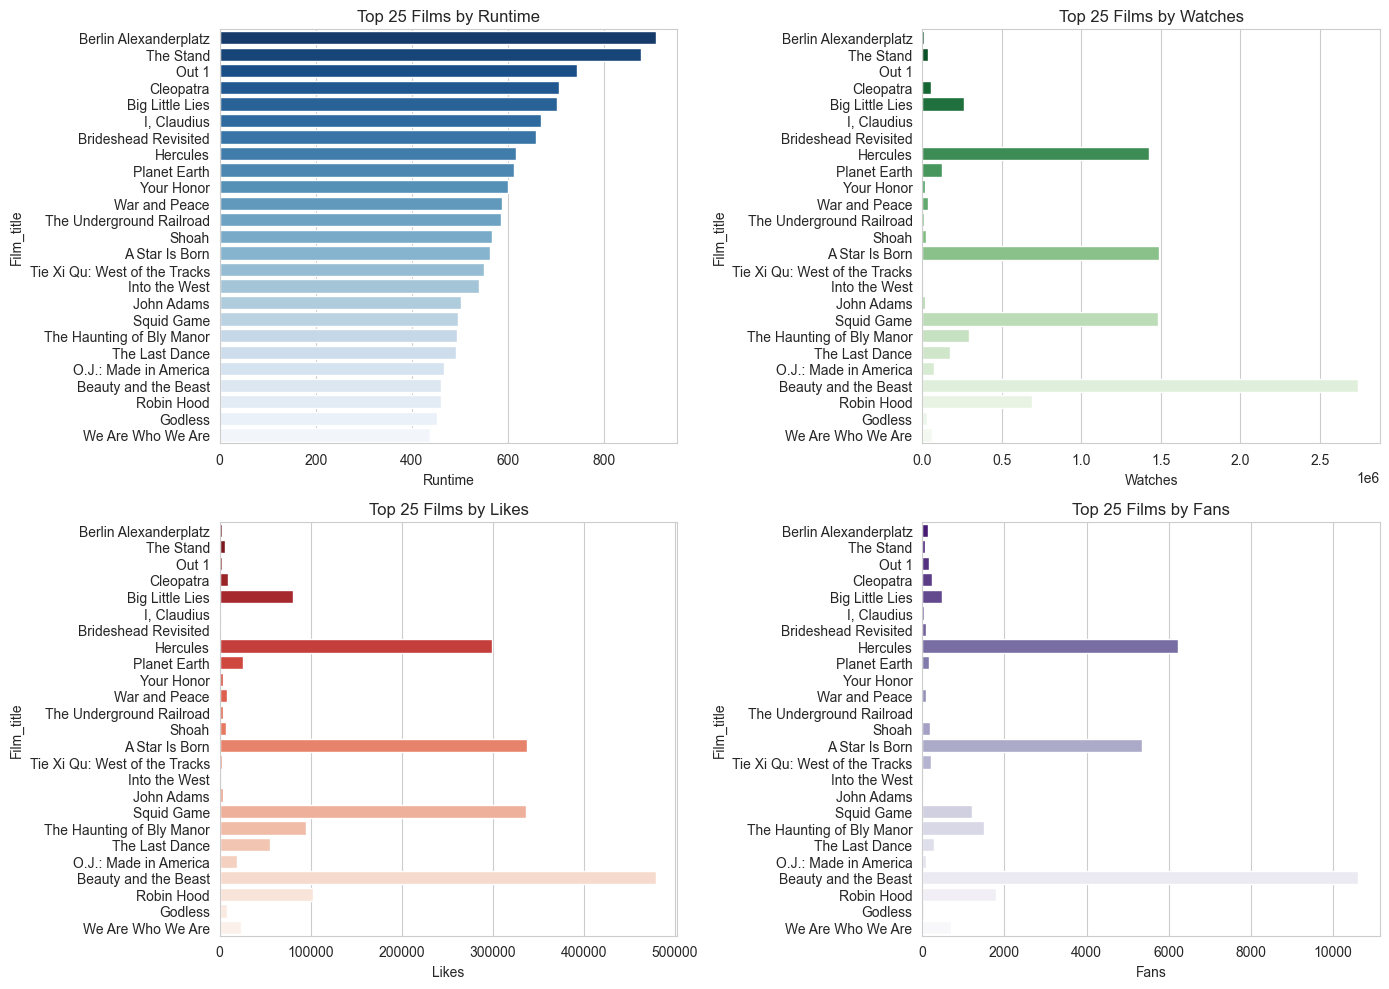

In [129]:
classifi_fi=df.groupby("Film_title").agg({ "Runtime":"sum", "Watches":"sum", "Likes":"sum", "Fans":"sum" }).reset_index()
classifi_film = classifi_fi.nlargest(25, ["Runtime", "Watches", "Likes", "Fans"])

# Define custom color palettes
runtime_palette = "Blues_r"   # Reverse blue shades
watches_palette = "Greens_r"  # Reverse green shades
likes_palette = "Reds_r"      # Reverse red shades
fans_palette = "Purples_r"    # Reverse purple shades

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Highest Runtime (Blue)
sns.barplot(data=classifi_film, x="Runtime", y="Film_title", ax=axes[0,0], palette=runtime_palette)
axes[0,0].set_title("Top 25 Films by Runtime")

# Highest Watches (Green)
sns.barplot(data=classifi_film, x="Watches", y="Film_title", ax=axes[0,1], palette=watches_palette)
axes[0,1].set_title("Top 25 Films by Watches")

# Highest Likes (Red)
sns.barplot(data=classifi_film, x="Likes", y="Film_title", ax=axes[1,0], palette=likes_palette)
axes[1,0].set_title("Top 25 Films by Likes")

# Highest Fans (Purple)
sns.barplot(data=classifi_film, x="Fans", y="Film_title", ax=axes[1,1], palette=fans_palette)
axes[1,1].set_title("Top 25 Films by Fans")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

## 🏢 6. Studios Behind the Success

We explored which studios consistently produced top-rated content.

- Grouped by `Film_title` and `Studios`.
- Created combined labels: `Film Title (Studio)` for bar visualization.
- Displayed **Top 30 films by total ratings**.

🏆 **Insight**: Certain studios (like Warner Bros, Universal, etc.) dominate the landscape. Their production power is reflected in consistent high ratings.

### `Top 30 Highest Rated Films and Their Studios`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\7784236.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




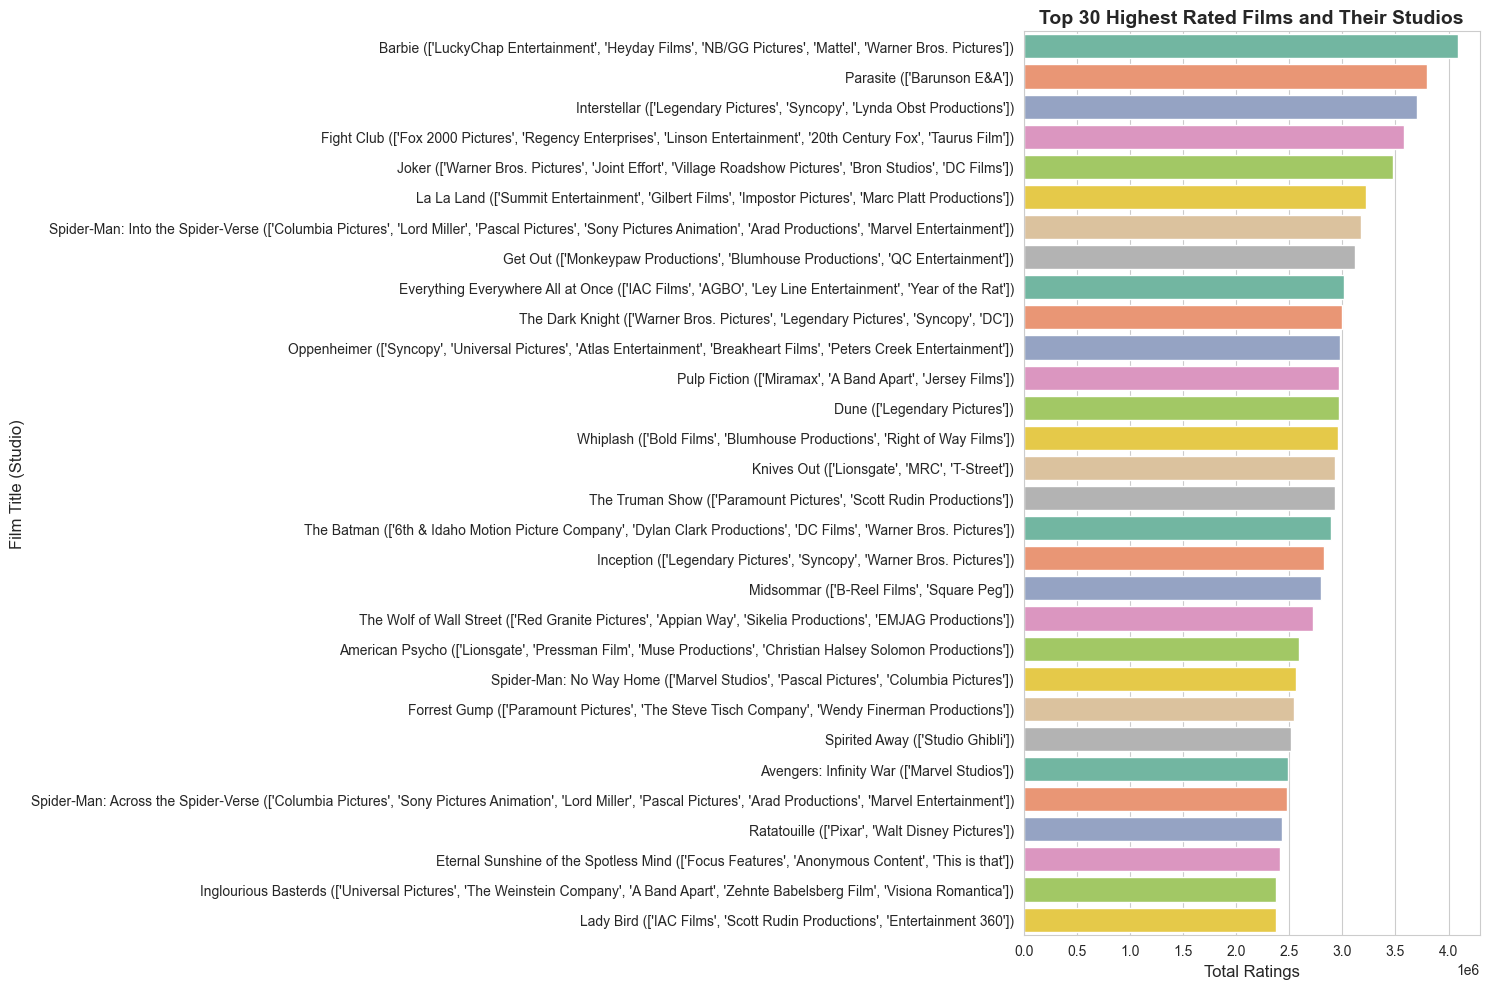

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get Top 30 Films with their Studios based on Total Ratings
classifi_ra = df.groupby(["Film_title", "Studios"])["Total_ratings"]\
                .sum().nlargest(30).reset_index()

# Create a new label combining Film title and Studio for clarity
classifi_ra["Film_Studio"] = classifi_ra["Film_title"] + " (" + classifi_ra["Studios"] + ")"

plt.figure(figsize=(15, 10))
sns.barplot(data=classifi_ra, x="Total_ratings", y="Film_Studio", palette="Set2")

plt.title("Top 30 Highest Rated Films and Their Studios", fontweight="bold", fontsize=14)
plt.xlabel("Total Ratings", fontsize=12)
plt.ylabel("Film Title (Studio)", fontsize=12)
plt.tight_layout()
plt.show()


### `Which Director Has The Highest Success In Ratings`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\1310174751.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




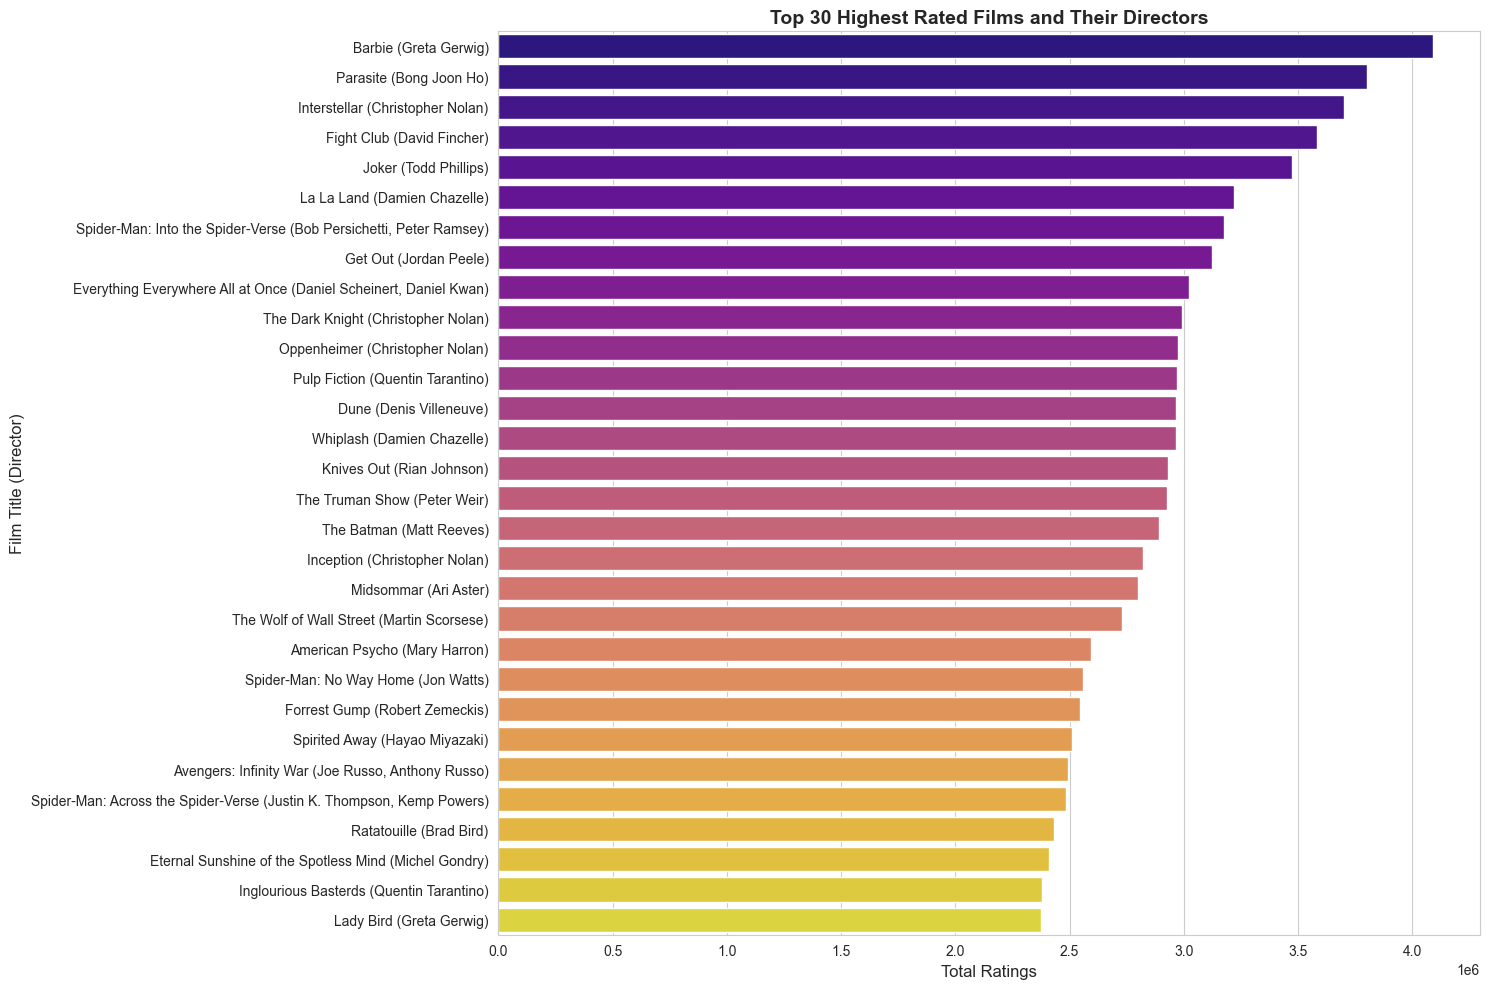

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get Top 30 Films with their Director based on Total Ratings
classifi_ra = df.groupby(["Film_title", "Director"])["Total_ratings"]\
                .sum().nlargest(30).reset_index()

# Create a new label combining Film title and Director for clarity
classifi_ra["Film_Director"] = classifi_ra["Film_title"] + " (" + classifi_ra["Director"] + ")"

plt.figure(figsize=(15, 10))
sns.barplot(data=classifi_ra, x="Total_ratings", y="Film_Director", palette="plasma")

plt.title("Top 30 Highest Rated Films and Their Directors", fontweight="bold", fontsize=14)
plt.xlabel("Total Ratings", fontsize=12)
plt.ylabel("Film Title (Director)", fontsize=12)
plt.tight_layout()
plt.show()


### `Which Films And Genre Are Most Popular Among Fans`

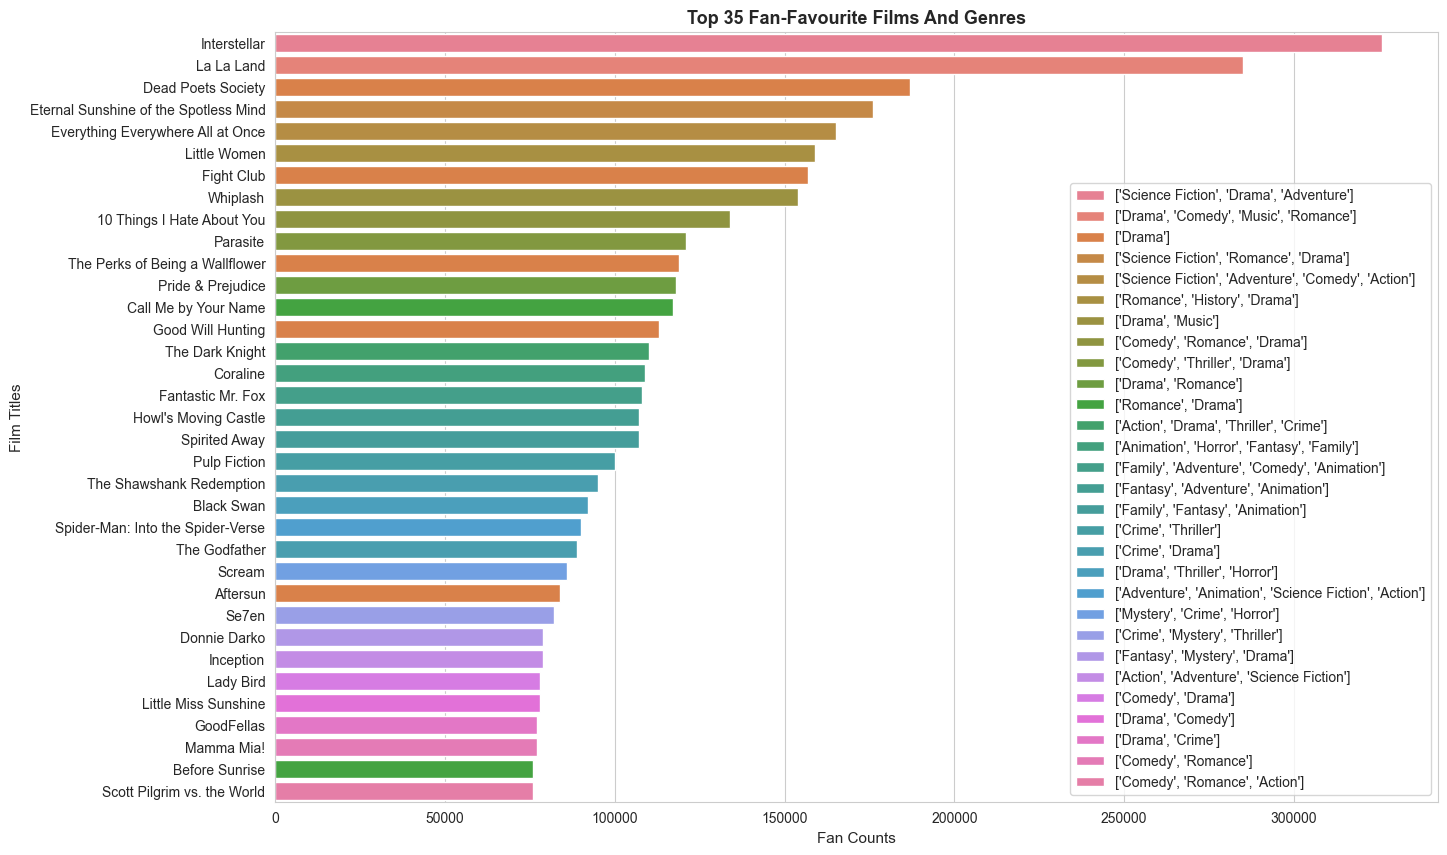

In [132]:
classifi_ge=df.groupby(["Film_title","Genres"])["Fans"].sum().nlargest(35).reset_index()
classifi_ge
plt.figure(figsize=(15,10))
sns.barplot(data=classifi_ge,x="Fans",y="Film_title",hue="Genres")
plt.title("Top 35 Fan-Favourite Films And Genres",fontweight="bold",fontsize=13)
plt.xlabel("Fan Counts",fontsize=11)
plt.ylabel("Film Titles",fontsize=11)
plt.legend()
plt.show()

### `Top 25 Highest Watched Movies`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\3955377460.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




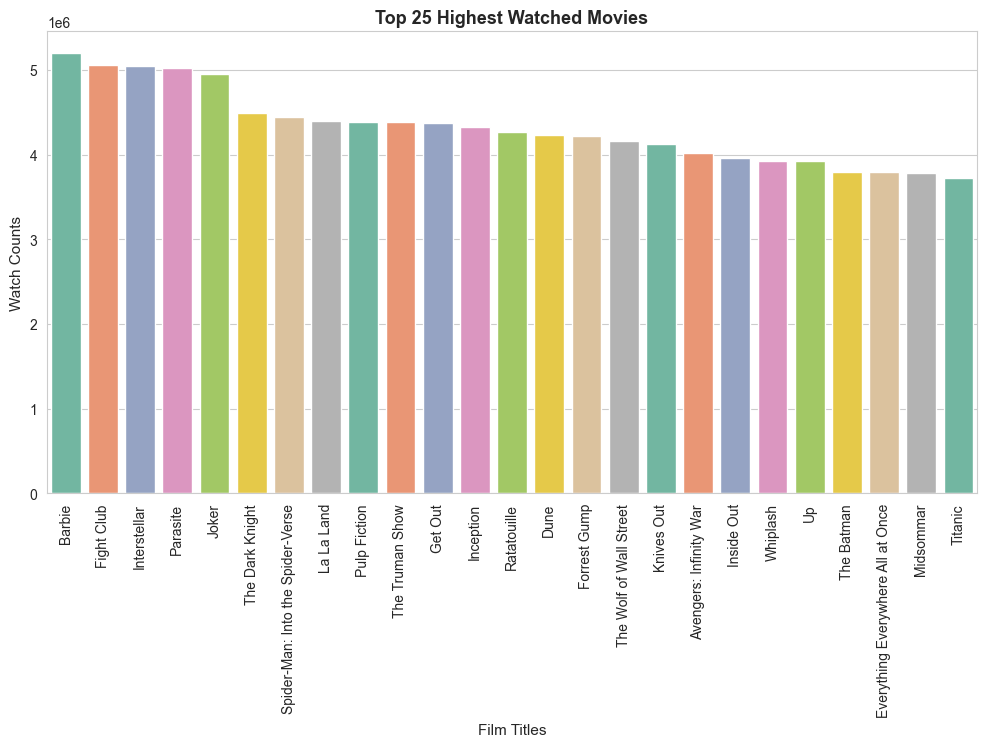

In [133]:
classfi_mov=df.groupby("Film_title")["Watches"].sum().nlargest(25).reset_index()
classfi_mov
plt.figure(figsize=(12,6))
sns.barplot(data=classfi_mov,x="Film_title",y="Watches",palette="Set2")
plt.title("Top 25 Highest Watched Movies",fontsize=13,fontweight="bold")
plt.xlabel("Film Titles",fontsize=11)
plt.ylabel("Watch Counts",fontsize=11)
plt.xticks(rotation=90)
plt.show()


### `Top 25 Highest Fancount Movies`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\2535299936.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




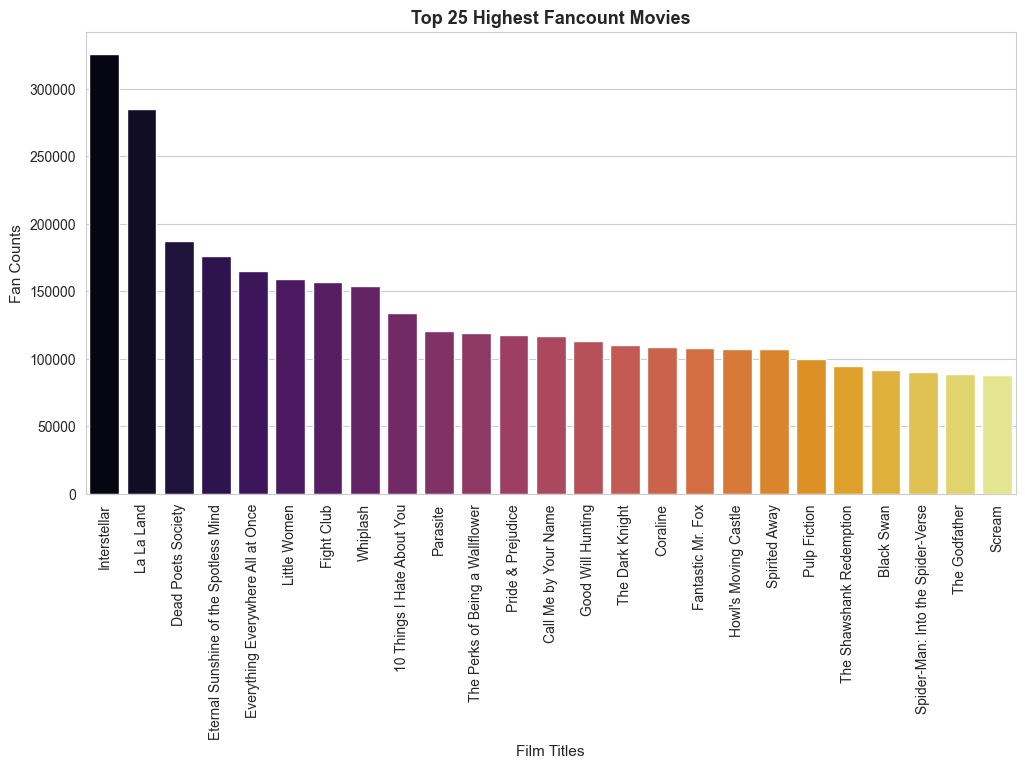

In [134]:
classfi_fan=df.groupby("Film_title")["Fans"].sum().nlargest(25).reset_index()
classfi_fan
plt.figure(figsize=(12,6))
sns.barplot(data=classfi_fan,x="Film_title",y="Fans",palette="inferno")
plt.title("Top 25 Highest Fancount Movies",fontsize=13,fontweight="bold")
plt.xlabel("Film Titles",fontsize=11)
plt.ylabel("Fan Counts",fontsize=11)
plt.xticks(rotation=90)
plt.show()

### ` Top 25 Highest Liked Films`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\4013322921.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




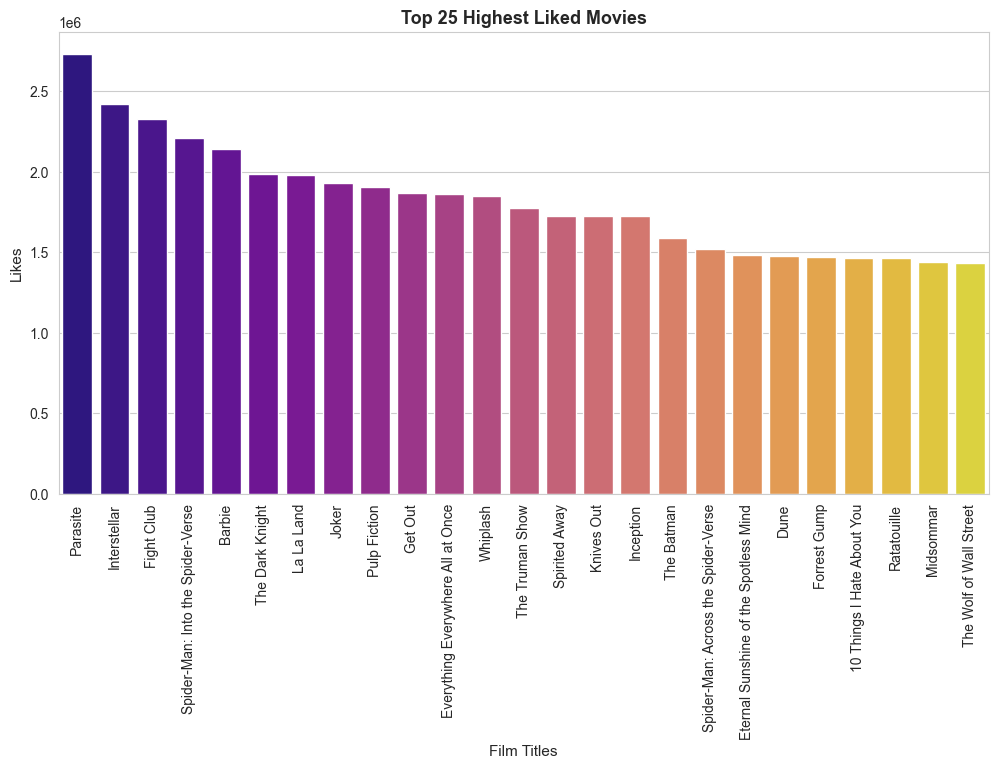

In [135]:
classfi_li=df.groupby("Film_title")["Likes"].sum().nlargest(25).reset_index()
classfi_li
plt.figure(figsize=(12,6))
sns.barplot(data=classfi_li,x="Film_title",y="Likes",palette="plasma")
plt.title("Top 25 Highest Liked Movies",fontsize=13,fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("Film Titles",fontsize=11)
plt.ylabel("Likes",fontsize=11)
plt.show()

### `Distribution of Movie Ratings`

In [136]:
import plotly.express as px

fig = px.histogram(df, x='Average_rating', nbins=20, title='Distribution of Movie Ratings')
fig.show()


💡 **Observation**: Engagement tends to cluster around a few standout titles.

---

## ⭐ 5. Rating-Based Film Rankings

Four categories were visualized side by side:
- 🟥 1★ Ratings (Lowest)
- 🟨 3★ Ratings (Medium)
- 🟩 5★ Ratings (Highest)
- 🔷 Total Ratings

All top 25 lists were plotted in a grid layout.

> 📈 *Not all ratings are equal — a 5★ speaks louder than five 1★s.*

---


### `Classificatrion Of Movie Ratings By Lowest,Medium, Highest And Total`

C:\Users\user\AppData\Local\Temp\ipykernel_21676\1943797772.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\1943797772.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\1943797772.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_21676\1943797772.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

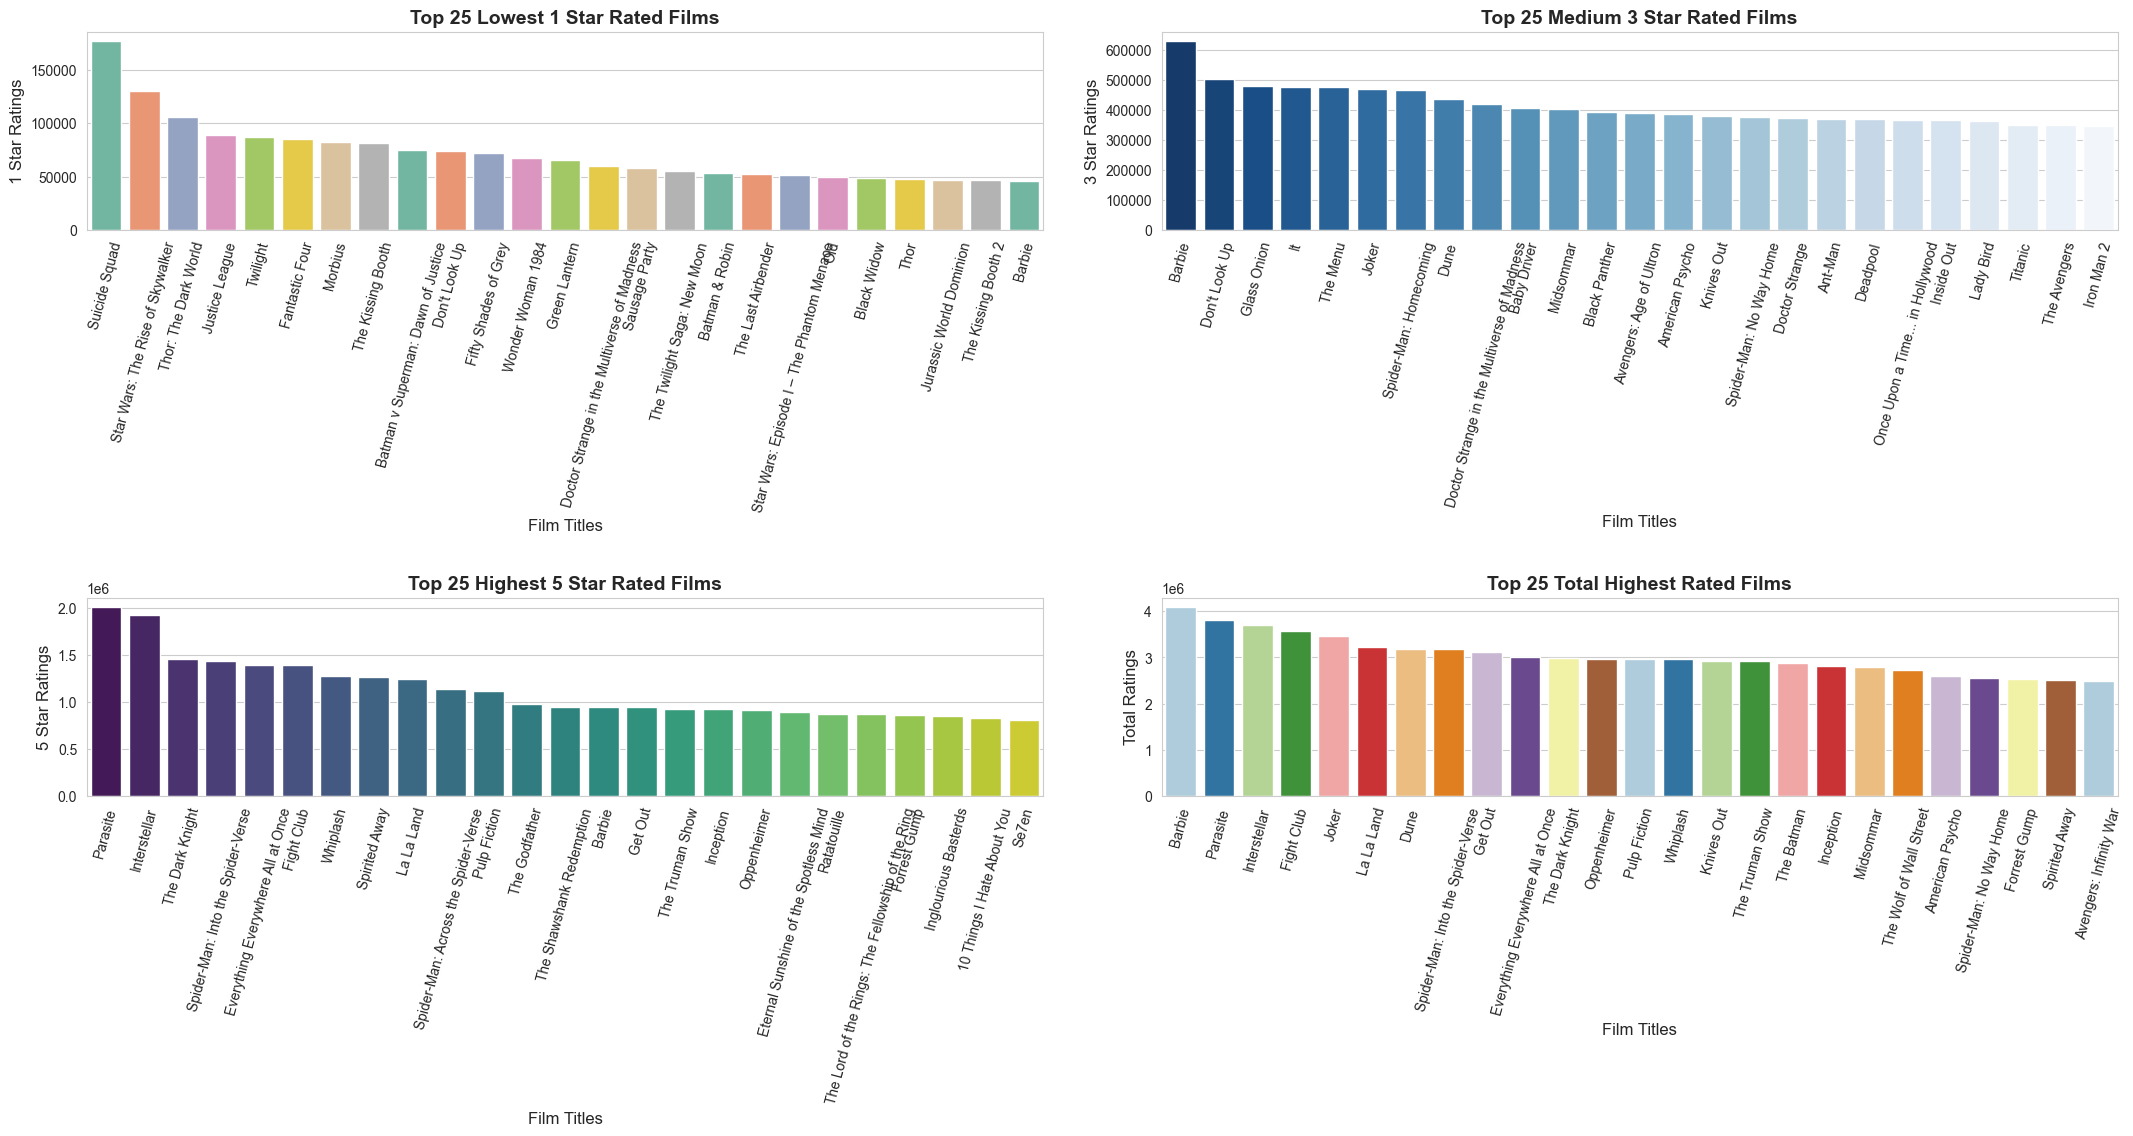

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(22, 12))  # Bigger figure

# Top 25 Lowest 1 Star Rated Films
lowest_rated = df.groupby("Film_title")["Lowest★"].sum().reset_index()
lr = lowest_rated.sort_values("Lowest★", ascending=False).head(25)
sns.barplot(data=lr, x="Film_title", y="Lowest★", palette="Set2", ax=axs[0, 0])
axs[0, 0].set_title("Top 25 Lowest 1 Star Rated Films", fontweight="bold", fontsize=14)
axs[0, 0].set_xlabel("Film Titles", fontsize=12)
axs[0, 0].set_ylabel("1 Star Ratings", fontsize=12)
axs[0, 0].tick_params(axis='x', rotation=75)

# Top 25 Medium 3 Star Rated Films
medium_rated = df.groupby("Film_title")["Medium★★★"].sum().reset_index()
mr = medium_rated.sort_values("Medium★★★", ascending=False).head(25)
sns.barplot(data=mr, x="Film_title", y="Medium★★★", palette="Blues_r", ax=axs[0, 1])
axs[0, 1].set_title("Top 25 Medium 3 Star Rated Films", fontweight="bold", fontsize=14)
axs[0, 1].set_xlabel("Film Titles", fontsize=12)
axs[0, 1].set_ylabel("3 Star Ratings", fontsize=12)
axs[0, 1].tick_params(axis='x', rotation=75)

# Top 25 Highest 5 Star Rated Films
highest_rated = df.groupby("Film_title")["Highest★★★★★"].sum().reset_index()
hr = highest_rated.sort_values("Highest★★★★★", ascending=False).head(25)
sns.barplot(data=hr, x="Film_title", y="Highest★★★★★", palette="viridis", ax=axs[1, 0])
axs[1, 0].set_title("Top 25 Highest 5 Star Rated Films", fontweight="bold", fontsize=14)
axs[1, 0].set_xlabel("Film Titles", fontsize=12)
axs[1, 0].set_ylabel("5 Star Ratings", fontsize=12)
axs[1, 0].tick_params(axis='x', rotation=75)

# Top 25 Total Highest Rated Films
total_rated = df.groupby("Film_title")["Total_ratings"].sum().reset_index()
tr = total_rated.sort_values("Total_ratings", ascending=False).head(25)
sns.barplot(data=tr, x="Film_title", y="Total_ratings", palette="Paired", ax=axs[1, 1])
axs[1, 1].set_title("Top 25 Total Highest Rated Films", fontweight="bold", fontsize=14)
axs[1, 1].set_xlabel("Film Titles", fontsize=12)
axs[1, 1].set_ylabel("Total Ratings", fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=75)

plt.tight_layout(pad=3.0)
plt.show()



## 🧠 Conclusion & Takeaways

🎥 This data narrative reveals:
- The dominance of certain languages and studios.
- The power of runtime and audience engagement.
- That ratings tell a layered story — beyond just averages.

> 📊 *Data doesn’t replace cinematic art, but it decodes what audiences love.*

---

## 🛠️ Tools Used

- **Python** (Pandas, Seaborn, Matplotlib)
- **Jupyter Notebook** in **VS Code**


---
